In [1]:
import pandas as pd 
from sklearn.datasets import load_iris 


In [4]:
iris=load_iris ()
iris.feature_names
df=pd.DataFrame (iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df['target']=iris.target #since our df does not have target column
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
from matplotlib import pyplot as plt 

In [13]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

# Let us do some exploration of our dataset to find Regularization (c) of our Support Vector Boundary, What Favorable Gamma we can use (High or Low).

Text(0, 0.5, 'Sepal width (cm)')

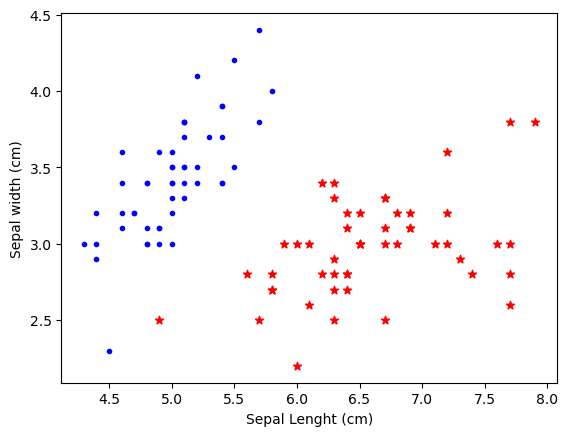

In [23]:

plt.scatter (df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue', marker='.')
plt.scatter (df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='*')

plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Sepal width (cm)')

Text(0, 0.5, 'Sepal width (cm)')

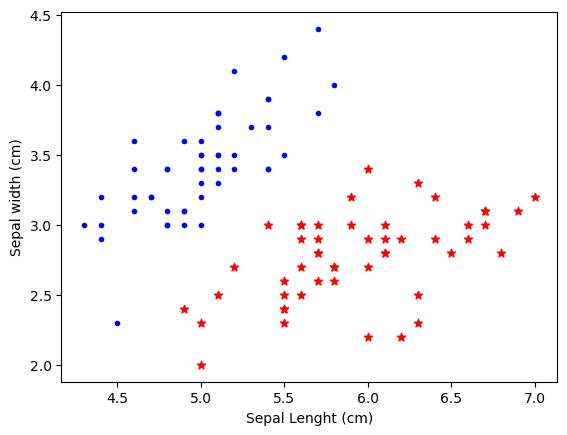

In [24]:

plt.scatter (df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue', marker='.')
plt.scatter (df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker='*')

plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Sepal width (cm)')

Text(0, 0.5, 'Petal width (cm)')

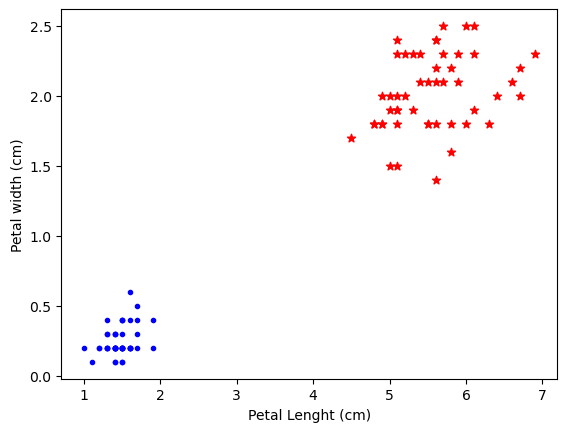

In [29]:

plt.scatter (df0['petal length (cm)'], df0['petal width (cm)'], color='blue', marker='.')
plt.scatter (df2['petal length (cm)'], df2['petal width (cm)'], color='red', marker='*')



plt.xlabel('Petal Lenght (cm)')
plt.ylabel('Petal width (cm)')

Text(0, 0.5, 'Petal width (cm)')

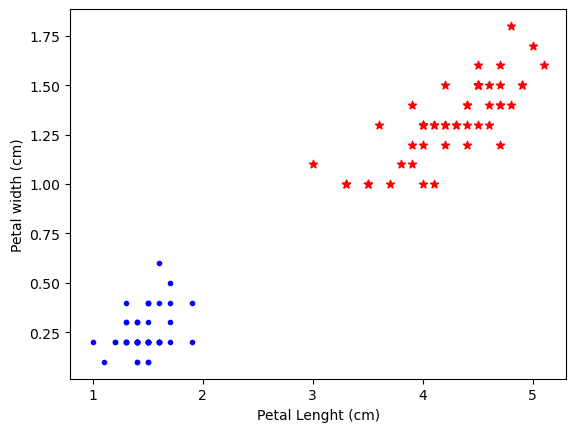

In [27]:

plt.scatter (df0['petal length (cm)'], df0['petal width (cm)'], color='blue', marker='.')
plt.scatter (df1['petal length (cm)'], df1['petal width (cm)'], color='red', marker='*')

plt.xlabel('Petal Lenght (cm)')
plt.ylabel('Petal width (cm)')

In [34]:
from sklearn.model_selection import train_test_split 
x=df.drop(['target'], axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
y=df.target

In [37]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)


In [40]:
len(x_train)


120

In [41]:
len(x_test)

30

# We train the model, evaluate the score and tweak the SVM boundary to try and optimize the  score.

In [42]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)


SVC()

In [43]:
model.score(x_test,y_test)

1.0

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k